# ObsID : 0945020137, SRCNUM : 21, Instru : Combined
Not on Simbad.

## ESASky
https://sky.esa.int/esasky/?target=52.73766666666666%20-28.63463888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected C-statistic value of a perfect fit is : **C-statistic ≈ 331 ± 26**. So between 305 and 357 approximately.

## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*src_spectrum_grp_cstat.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_src_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.481e-02 +/- 1.532e-03 (41.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-364
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 1.754e+04 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945020137_SRCNUM21_bkg_spectrum_grp.fits
  Background Exposure Time: 1.753e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_response_grp.rmf for Source 1



In [4]:
print(f"Number of counts = {1.481e-02*1.754e+04} cts")

Number of counts = 259.7674 cts


The number of counts exceeds 100 cts, indicating that the chi-squared test should be a good choice for a goodness-of-fit statistic. However, it does not work in this case so we use C-statistic instead.

## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

    13 channels (1-13) ignored in spectrum #     1
    20 channels (345-364) ignored in spectrum #     1



(-0.5, 857.5, 660.5, -0.5)

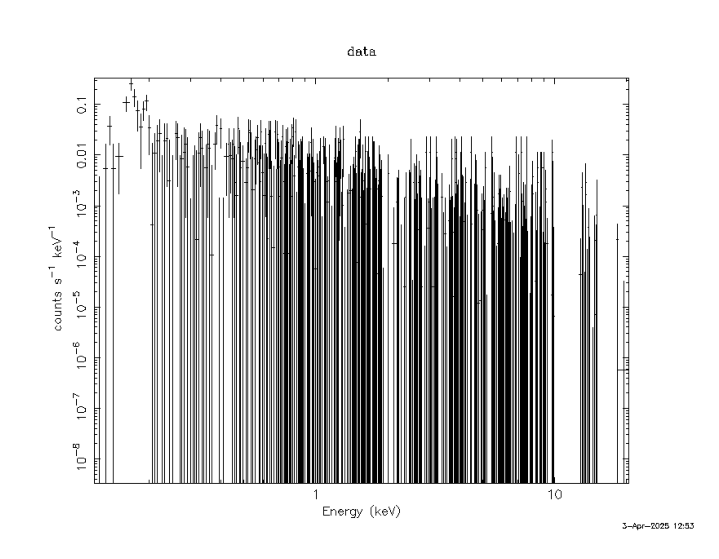

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
The C-statistic value of **367.3937** falls above the range [305–357], indicating a bad fit.

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              1.000500e+08     using 331 bins.

T

(-0.5, 854.5, 657.5, -0.5)

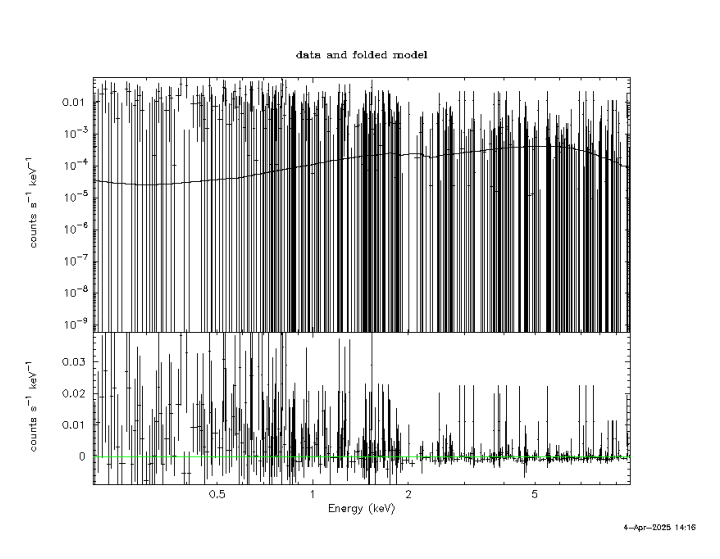

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
The C-statistic value of **271.5272** falls beneath the range [305–357], indicating a good fit.

Third lowest C-statistic value.

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.111363e+07     using 331 bins.

Test statistic : Chi-Squared              7.701914e+11     using 331 bins.
 Null hypothesis probability of 0.000000e+00 with 328 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
794729       3.91178e+06  -3      0.143705       199.292     0.0332368
458683       4.01434e+06  -1     0.0225616       199.342     0.0153776
226144       5.02599e+06  -1    0.00909023       199.354    0.007374

(-0.5, 856.5, 656.5, -0.5)

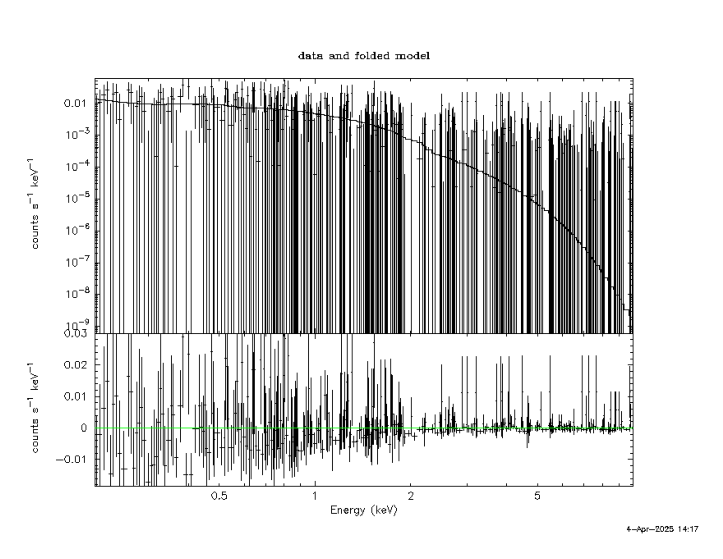

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
The C-statistic value of **285.6567** falls beneath the range [305–357], indicating a good fit.

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic              7.818722e+06     using 331 bins.

Test statistic : Chi-Squared              1.541876e+11     using 331 bins.
 Null hypothesis probability of 0.000000e+00 with 328 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
4.1015e+06   2.31092e+06  -3      0.271210       46.6003

(-0.5, 854.5, 656.5, -0.5)

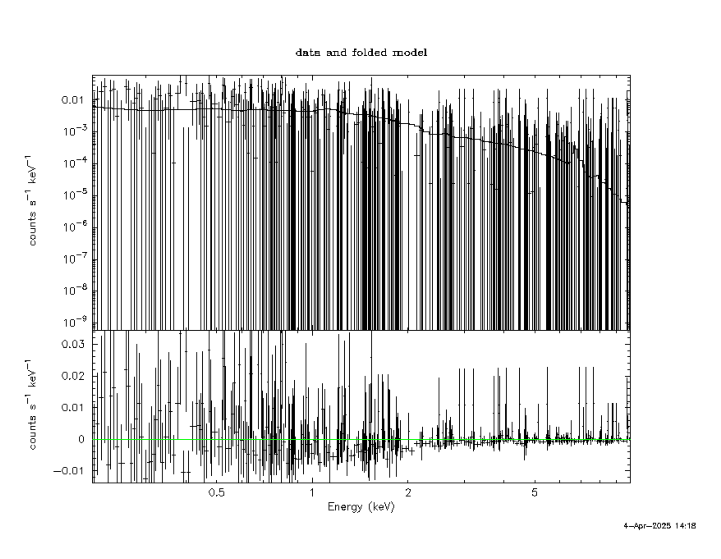

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec + Apec model
The C-statistic value of 285.6564 falls beneath the range [305–357], indicating a good fit.

In [13]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.564335e+07     using 331 bins.

Test statistic : Chi-Squared              6.167524e+11     using 331 bins.
 Null hypothesis probabili

(-0.5, 851.5, 656.5, -0.5)

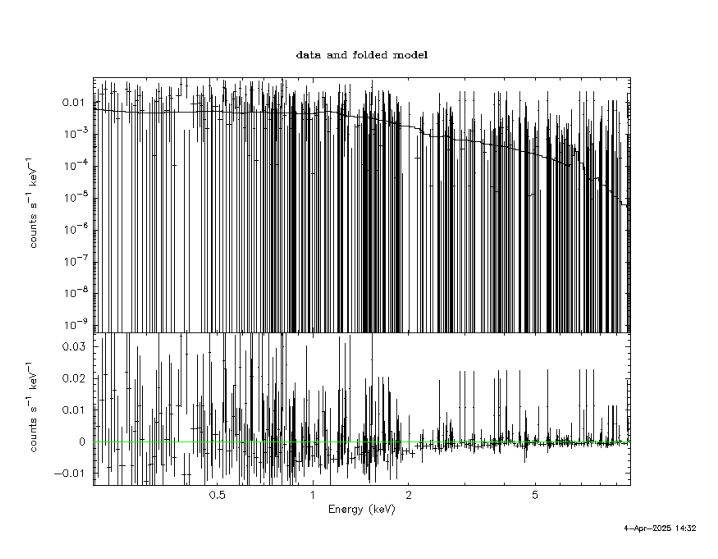

In [14]:
img = plt.imread(glob.glob("ObsID*SRCNUM*Spectrum_apecapec2.png")[0])
plt.imshow(img)
plt.axis('off')

### Gauss + Bremss model
**Energy: LineE = 6.4 to LineE = 6.7**

The C-statistic value of **265.6273** falls beneath the range [305–357], indicating a good fit.

Lowest C-statistic value.

In [32]:
AllModels.clear()
mo = Model("tbabs*(gauss+bremss)")
mo.gaussian.LineE = 6.5
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_gaussbremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>(gaussian<2> + bremss<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   gaussian   LineE      keV      6.50000      +/-  0.0          
   3    2   gaussian   Sigma      keV      0.100000     +/-  0.0          
   4    2   gaussian   norm                1.00000      +/-  0.0          
   5    3   bremss     kT         keV      7.00000      +/-  0.0          
   6    3   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.381540e+07     using 331 bins.

Test statistic : Chi-Squared              1.994757e+13     using 331 bins.
 Null hypothesis probability of 0.000000e+00 with 325 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              4.381540e+07     using 331 bins.

Test stati

(-0.5, 855.5, 655.5, -0.5)

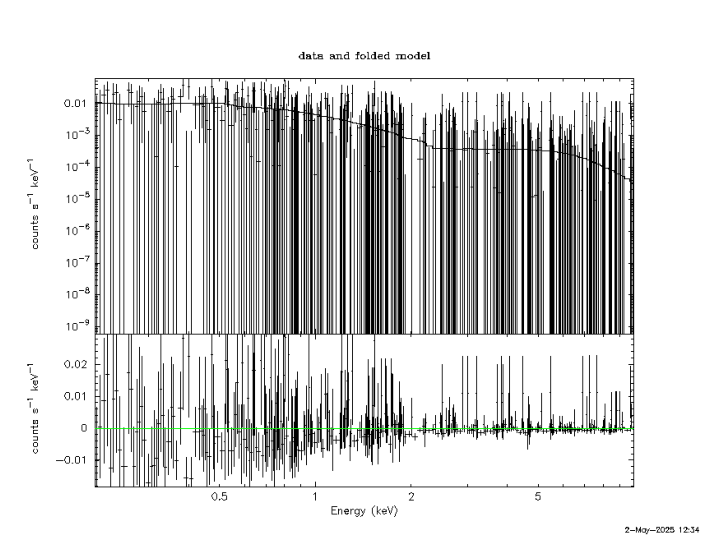

In [33]:
img = plt.imread(glob.glob("ObsID*SRCNUM*Spectrum_gaussbremss2.png")[0])
plt.imshow(img)
plt.axis('off')

### Gauss + Powerlaw model
**Energy: LineE = 6.4 to LineE = 6.7**

The C-statistic value of **266.0146** falls beneath the range [305–357], indicating a good fit.

Second lowest C-statistic value.

In [40]:
AllModels.clear()
mo = Model("tbabs*(gauss+powerlaw)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_gausspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>(gaussian<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   gaussian   LineE      keV      6.50000      +/-  0.0          
   3    2   gaussian   Sigma      keV      0.100000     +/-  0.0          
   4    2   gaussian   norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              7.624475e+07     using 331 bins.

Test statistic : Chi-Squared              2.585260e+13     using 331 bins.
 Null hypothesis probability of 0.000000e+00 with 325 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              7.431969e+07     using 331 bins.

Test sta

(-0.5, 857.5, 661.5, -0.5)

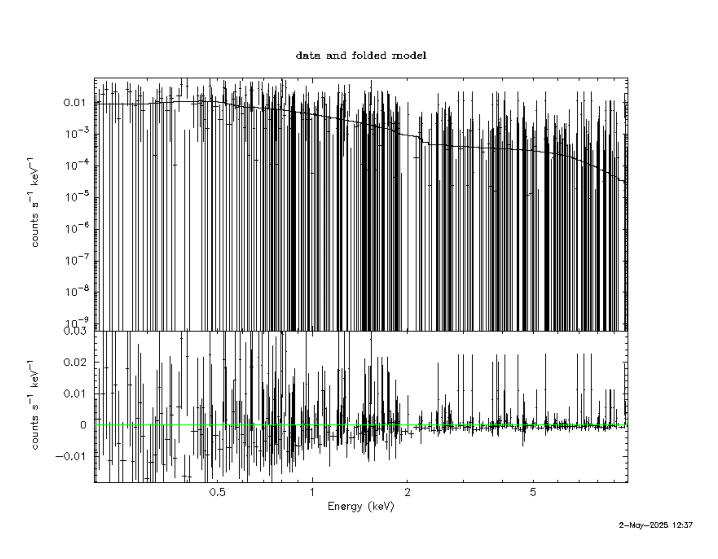

In [41]:
img = plt.imread(glob.glob("ObsID*SRCNUM*Spectrum_gausspowerlaw2.png")[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.7376939°
- Dec = -28.6344882°

52.74 -28.63

**Column density :** nH = 10^20 cm^-2

In [43]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"nH = {nH_bbody*10**22} cm^-2")
print()
print(color.BOLD+"bremss (Third best fit)"+color.END)
print(f"nH = {nH_bremss*10**22} cm^-2")
print()
print(color.BOLD+"apec (Fourth best fit (bis))"+color.END)
print(f"nH = {nH_apec*10**22} cm^-2")
print()
print(color.BOLD+"apec+apec (Fourth best fit)"+color.END)
print(f"nH = {nH_apecapec*10**22} cm^-2")
print()
print(color.BOLD+"gauss+bremss (Best fit)"+color.END)
print(f"nH = {nH_gaussbremss*10**22} cm^-2")
print()
print(color.BOLD+"gauss+powerlaw (Second best fit)"+color.END)
print(f"nH = {nH_gausspowerlaw*10**22} cm^-2")

The different models give a column density of :

bbody
nH = 315304.3019994523 cm^-2

bremss (Third best fit)
nH = 640157.9956971233 cm^-2

apec (Fourth best fit (bis))
nH = 613784.1786908271 cm^-2

apec+apec (Fourth best fit)
nH = 194393.2521284335 cm^-2

gauss+bremss (Best fit)
nH = 2.1480988603760984e+20 cm^-2

gauss+powerlaw (Second best fit)
nH = 6.002797820141902e+20 cm^-2


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Gauss + Bremss`` with C-statistic = 265.6273 using 331 bins: **5.3547e-14 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Gauss + Powerlaw`` with C-statistic = 266.0146 using 331 bins: **4.6437e-14 ergs/cm^2/s**.
- X-ray flux of the third best-fitting model ``Bremss`` with C-statistic = 271.5272 using 331 bins: **1.5386e-14 ergs/cm^2/s**.
- X-ray flux of the fourth best-fitting models ``Apec + Apec`` and ``Apec`` with C-statistic = 285.6564 and C-statistic = 285.6567 using 331 bins: **2.9506e-14 ergs/cm^2/s** and **2.9506e-14 ergs/cm^2/s** respectively.

In [45]:
Flux_gb = 5.3547e-14 # ergs/cm^2/s
Flux_gp = 4.6437e-14 # ergs/cm^2/s
Flux_bremss = 1.5386e-14 # ergs/cm^2/s
Flux_apec= 2.9506e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Gauss + Bremss : F_x-ray = {Flux_gb} ergs/cm^2/s")
print(f"Gauss + Powerlaw : F_x-ray = {Flux_gb} ergs/cm^2/s")
print(f"Bremss : F_x-ray = {Flux_bremss} ergs/cm^2/s")
print(f"Apec : F_x-ray = {Flux_apec} ergs/cm^2/s")

X-ray flux : 
Gauss + Bremss : F_x-ray = 5.3547e-14 ergs/cm^2/s
Gauss + Powerlaw : F_x-ray = 5.3547e-14 ergs/cm^2/s
Bremss : F_x-ray = 1.5386e-14 ergs/cm^2/s
Apec : F_x-ray = 2.9506e-14 ergs/cm^2/s


### Optical flux
No GAIA information, so we use the lower limit of 20.7 mag.

In [25]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7 # lower limit

F = F_optical(G)

print(color.BOLD+"Optical flux (lower limit) : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux (lower limit) : F_optical = 5.510478332622621e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [47]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END)
print(f"Gauss + Bremss : F_x-ray/F_optical = {Flux_gb/F} ergs/cm^2/s")
print(f"Gauss + Powerlaw : F_x-ray/F_optical = {Flux_gb/F} ergs/cm^2/s")
print(f"Bremss : F_x-ray/F_optical = {Flux_bremss/F}")
print(f"Apec : F_x-ray/F_optical = {Flux_apec/F}")

X-ray flux / Optical flux ratio : 
Gauss + Bremss : F_x-ray/F_optical = 0.9717305244264556 ergs/cm^2/s
Gauss + Powerlaw : F_x-ray/F_optical = 0.9717305244264556 ergs/cm^2/s
Bremss : F_x-ray/F_optical = 0.27921351053888066
Apec : F_x-ray/F_optical = 0.5354526089926046


### Maccacaro et al. paper: log(fx/fv)
https://articles.adsabs.harvard.edu/pdf/1988ApJ...326..680M
- fx : X-ray flux in the 0.3-3.5 keV band in ergs/cm^2/s.
- mv : Visual magnitude.

In [52]:
def logfxfv(fx,mv):
    return np.log10(fx)+(mv/2.5)+5.37

fx_gb = 1.4311e-14 # ergs/cm^2/s
fx_gp = 1.4776e-14 # ergs/cm^2/s
fx_bremss = 1.2956e-14 # ergs/cm^2/s
fx_apec = 1.566e-14 # ergs/cm^2/s

logfxfv_gb = logfxfv(fx_gb,G)
logfxfv_gp = logfxfv(fx_gp,G)
logfxfv_bremss = logfxfv(fx_bremss,G)
logfxfv_apec = logfxfv(fx_apec,G)

print(color.BOLD+"X-ray flux [0.3-3.5] keV : "+color.END)
print(f"Gauss + Bremss : fx = {fx_gb} ergs/cm^2/s")
print(f"Gauss + Powerlaw : fx = {fx_gp} ergs/cm^2/s")
print(f"Bremsstrahlung : fx = {fx_bremss} ergs/cm^2/s")
print(f"Apec : fx = {fx_apec} ergs/cm^2/s")
print()
print(color.BOLD+"log(fx/fv) : "+color.END)
print(f"Gauss + Bremss : log(fx/fv) = {logfxfv_gb} ergs/cm^2/s")
print(f"Gauss + Powerlaw : log(fx/fv) = {logfxfv_gp} ergs/cm^2/s")
print(f"Bremsstrahlung : log(fx/fv) = {logfxfv_bremss}")
print(f"Apec : log(fx/fv) = {logfxfv_apec}")

X-ray flux [0.3-3.5] keV : 
Gauss + Bremss : fx = 1.4311e-14 ergs/cm^2/s
Gauss + Powerlaw : fx = 1.4776e-14 ergs/cm^2/s
Bremsstrahlung : fx = 1.2956e-14 ergs/cm^2/s
Apec : fx = 1.566e-14 ergs/cm^2/s

log(fx/fv) : 
Gauss + Bremss : log(fx/fv) = -0.1943300182801897 ergs/cm^2/s
Gauss + Powerlaw : log(fx/fv) = -0.18044311756781628 ergs/cm^2/s
Bremsstrahlung : log(fx/fv) = -0.23752906066186075
Apec : log(fx/fv) = -0.15520824227807584


## Luminosity
No distance or parallax data is available on ESASky.

In [54]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1_gb = 4*np.pi*Flux_gb*(d1_cm)**2 # erg/s
L2_gb = 4*np.pi*Flux_gb*(d2_cm)**2 # erg/s
L1_gp = 4*np.pi*Flux_gp*(d1_cm)**2 # erg/s
L2_gp = 4*np.pi*Flux_gp*(d2_cm)**2 # erg/s
L1_bremss = 4*np.pi*Flux_bremss*(d1_cm)**2 # erg/s
L2_bremss = 4*np.pi*Flux_bremss*(d2_cm)**2 # erg/s
L1_apec = 4*np.pi*Flux_apec*(d1_cm)**2 # erg/s
L2_apec = 4*np.pi*Flux_apec*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of a galactic source with d=[1 pc - 30 kpc] :"+color.END)
print(f"Gauss + Bremss : L_x-ray = [{L1_gb}, {L2_gb}] erg/s")
print(f"Gauss + Powerlaw : L_x-ray = [{L1_gp}, {L2_gp}] erg/s")
print(f"Bremss : L_x-ray = [{L1_bremss}, {L2_bremss}] erg/s")
print(f"Apec : L_x-ray = [{L1_apec}, {L2_apec}] erg/s")
print()

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1_gb = 4*np.pi*Flux_gb*(d1_cm)**2 # erg/s
L2_gb = 4*np.pi*Flux_gb*(d2_cm)**2 # erg/s
L1_gp = 4*np.pi*Flux_gp*(d1_cm)**2 # erg/s
L2_gp = 4*np.pi*Flux_gp*(d2_cm)**2 # erg/s
L1_bremss = 4*np.pi*Flux_bremss*(d1_cm)**2 # erg/s
L2_bremss = 4*np.pi*Flux_bremss*(d2_cm)**2 # erg/s
L1_apec = 4*np.pi*Flux_apec*(d1_cm)**2 # erg/s
L2_apec = 4*np.pi*Flux_apec*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of an extragalactic source with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Gauss + Bremss : L_x-ray = [{L1_gb}, {L2_gb}] erg/s")
print(f"Gauss + Powerlaw : L_x-ray = [{L1_gp}, {L2_gp}] erg/s")
print(f"Bremss : L_x-ray = [{L1_bremss}, {L2_bremss}] erg/s")
print(f"Apec : L_x-ray = [{L1_apec}, {L2_apec}] erg/s")
print()

Luminosity of a galactic source with d=[1 pc - 30 kpc] :
Gauss + Bremss : L_x-ray = [6.406965852284523e+24, 6.406965852284522e+30] erg/s
Gauss + Powerlaw : L_x-ray = [5.556245415850307e+24, 5.556245415850306e+30] erg/s
Bremss : L_x-ray = [1.8409542383933678e+24, 1.8409542383933675e+30] erg/s
Apec : L_x-ray = [3.5304299855735546e+24, 3.5304299855735544e+30] erg/s

Luminosity of an extragalactic source with d=[1 Mpc - 10 Gpc] :
Gauss + Bremss : L_x-ray = [6.406965852284523e+36, 6.4069658522845235e+44] erg/s
Gauss + Powerlaw : L_x-ray = [5.556245415850307e+36, 5.556245415850307e+44] erg/s
Bremss : L_x-ray = [1.840954238393368e+36, 1.840954238393368e+44] erg/s
Apec : L_x-ray = [3.5304299855735546e+36, 3.530429985573555e+44] erg/s



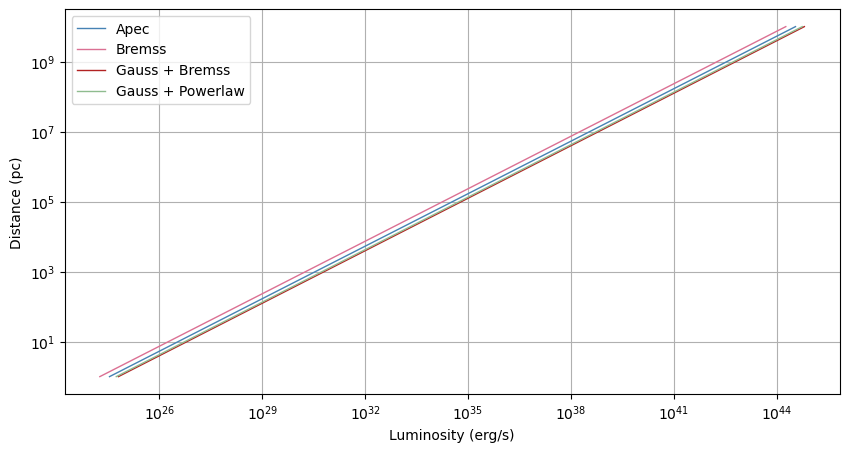

In [55]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L_gb = 4*np.pi*Flux_gb*(d_cm)**2 # erg/s
L_gp = 4*np.pi*Flux_gp*(d_cm)**2 # erg/s
L_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s
L_apec = 4*np.pi*Flux_apec*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L_apec,D_pc, lw=1, color='steelblue', label="Apec")
plt.plot(L_bremss,D_pc, lw=1, color='palevioletred', label="Bremss")
plt.plot(L_gb,D_pc, lw=1, color='firebrick', label="Gauss + Bremss")
plt.plot(L_gp,D_pc, lw=1, color='darkseagreen', label="Gauss + Powerlaw")
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.legend(loc='best')
plt.xscale("log")
plt.yscale("log")
plt.grid()